# Converting an image to a pencil sketch

We will be following four steps to do this:
1. Convert the colored image(RGB) to a grayscale image.
2. Invert the grayscale image(obtained in step 1) to get a negative image.
3. Blurring of the negative image obtained in step 2. We have used Gaussian blur here.
4. Blend the grayscale image with the blurred negative using a color dodge.
5. (Optional) Added appeal: we will lightly blend our transformed image with a background canavs image that makes it look as if we drew the image on a canvas.

In [35]:
#importing the necessary libraries
#make sure they are properly installed
import cv2
import sys
from matplotlib import pyplot as plt

In [36]:
#reading image
#make sure your image is in the same directory where your program file is located
#the parameter is your file name 
image = cv2.imread("scenery.jpg")

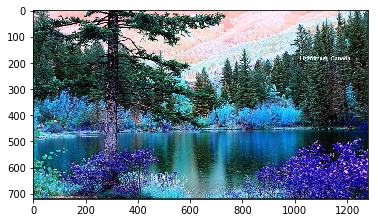

In [48]:
plt.imshow(image)

In [37]:
#check if image exists/is able to load otherwise quit the system
if image is None:
    print("can not find image")
    sys.exit()

In [38]:
#grayscaling the image
#This effectively makes the image a classic “black and white” photo
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

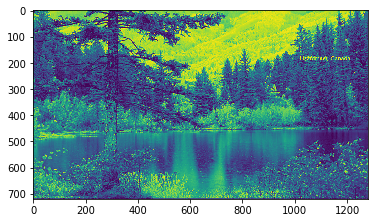

In [40]:
plt.imshow(grayImage)

In [41]:
#invert the grayscaled image also known as getting the image negative
#In a photographic negative, the dark areas in the input image become light and light areas become dark.
#We can invert images simply by subtracting from 255, as grayscale images are 8 bit images or have a maximum of 256 tones
grayImageInv = 255 - grayImage

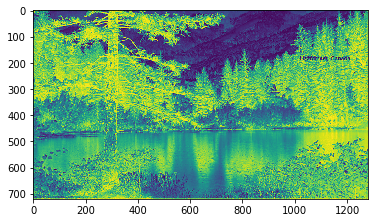

In [42]:
plt.imshow(grayImageInv)

In [43]:
#Applying Gaussian blur to the inverted image
#It helps in smoothing the image.
#Low intensity edges are removed.
#We should specify the width and height of the kernel which should be positive and odd, like in our case it is 21,21 respectively for sufficient blurring.
#We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively.
#If only sigmaX is specified, sigmaY is taken as the same as sigmaX. Here both are zero, so they are calculated from the kernel size.
grayImageInv = cv2.GaussianBlur(grayImageInv, (21, 21), 0)

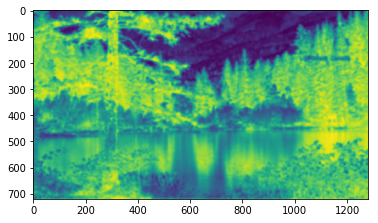

In [44]:
plt.imshow(grayImageInv)

In [45]:
#Now we will create the pencil sketch image by blending our grayscaled image with our inverted blurred image. 
#We can do this by dividing the grayscaled image by the inverted blurred image. 
#Since images are just arrays we can easily do this in programming by using the divide function from the cv2 library.
#This is called dodging(analogous to burning)
output = cv2.divide(grayImage, 255-grayImageInv, scale=256.0)

# This is the required final image without the optional part.

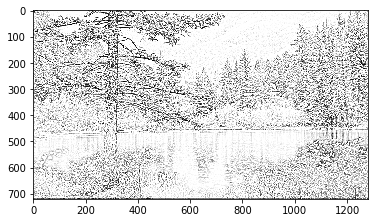

In [61]:
plt.imshow(output, cmap="gray")

# Optional

In [49]:
#reading the canvas image
img_canvas = cv2.imread("canvasimage.jpg")

In [50]:
#check if image exists/is able to load otherwise quit the system
if img_canvas is None:
    print("can not find image")
    sys.exit()

In [51]:
#calculating the shape of the dodged image
height,width=output.shape

In [52]:
#resizing the background canvas image accordingly 
resized = cv2.resize(img_canvas, (width,height), interpolation = cv2.INTER_AREA)

In [53]:
#grayscaling the background image to eliminate the colour channel
gray=cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

Now both background image and dodged image are of exactly same size

In [54]:
#blending the background canvas with the dodged image
output1 = cv2.multiply(output, gray, scale=1./256)

Creating windows to display the images

In [55]:
#to display the original image
cv2.namedWindow("image", cv2.WINDOW_AUTOSIZE)

In [56]:
#to display the transformed image
cv2.namedWindow("pencilsketch", cv2.WINDOW_AUTOSIZE)

In [57]:
#display images in the respective windows
cv2.imshow("image", image)
cv2.imshow("pencilsketch", output1)

In [58]:
#press esc to exit the program
cv2.waitKey(0)

-1

In [59]:
#close all the opened windows
cv2.destroyAllWindows()